[*********************100%***********************]  1 of 1 completed

MSE: 4.407749566068014
R² Score: 0.9627095981932735



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


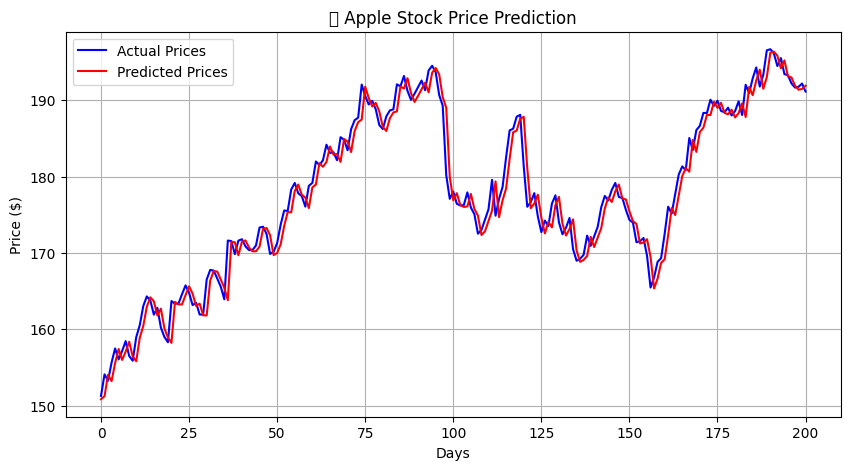

In [2]:
# 📈 Stock Price Prediction using ML

# STEP 1: Install yfinance
!pip install yfinance

# STEP 2: Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# STEP 3: Load Stock Data (Example: Apple Inc.)
ticker = "AAPL"
df = yf.download(ticker, start="2020-01-01", end="2023-12-31")
df = df[['Close']].dropna()

# STEP 4: Create Features (Lagged Closing Prices)
df['Prev_Close'] = df['Close'].shift(1)
df = df.dropna()

# STEP 5: Train-Test Split
X = df[['Prev_Close']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# STEP 6: Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# STEP 7: Predict
y_pred = model.predict(X_test)

# STEP 8: Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# STEP 9: Plot Predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title("📈 Apple Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()
